# Лабораторная работа №1


## Задание №1

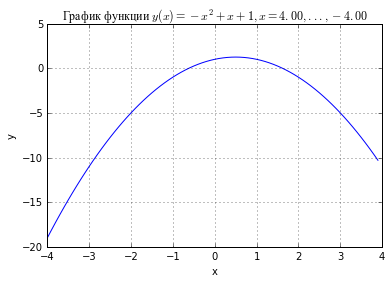

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-4., 4, 0.1);
y = -x**2+x+1
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции $y(x)=-x^2+x+1, x=4.00,...,-4.00$', family="Times New Roman")
plt.show()

## Задание 2

In [59]:
np.random.seed(25)
A = np.random.rand(3,3)
invA = np.linalg.inv(A)
b = np.random.rand(3)
x = np.linalg.solve(A,b)

print('A=')
print(A)
print('A^-1=')
print(invA)
print('b = {}'.format(b))
print('Решение СЛАУ Ax=b')
print('x= {}'.format(x))

A=
[[ 0.87012414  0.58227693  0.27883894]
 [ 0.18591123  0.41110013  0.11737555]
 [ 0.68496874  0.43761106  0.55622933]]
A^-1=
[[ 2.08485641 -2.37359945 -0.54426584]
 [-0.27057925  3.44525485 -0.59137594]
 [-2.35451988  0.21243003  2.93331844]]
b = [ 0.36708032  0.40236573  0.1130407 ]
Решение СЛАУ Ax=b
x= [-0.2512695   1.22007861 -0.44723898]
